# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [572]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
study_results_path = "data/Study_results.csv"
mouse_metadata_path = "data/Mouse_metadata.csv"
new_df_path= ("data/new_df.csv")

# Read the mouse data and the study results
study_results = pd.read_csv(study_results_path)
mouse_metadata = pd.read_csv(mouse_metadata_path)



# Combine the data into a single dataset
merge_df = pd.merge(study_results,mouse_metadata, on="Mouse ID", how="outer" )

# Display the data table for preview
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [573]:
# Checking the number of mice.
number_mice = merge_df["Mouse ID"].nunique()

print(f'Total mice population was: {number_mice}')

Total mice population was: 249


In [574]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicated_mice_df = merge_df.duplicated(subset=["Mouse ID","Timepoint"], keep=False)

In [575]:


duplicated_mice_ID_df = merge_df.loc[duplicated_mice_df, "Mouse ID"].unique()
duplicated_mice_ID_df

array(['g989'], dtype=object)

In [576]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice_ID_Summary = merge_df.loc[merge_df['Mouse ID'] == duplicated_mice_ID_df[0]]
duplicated_mice_ID_Summary

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [577]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_df = merge_df.drop(duplicated_mice_ID_Summary.index)
new_df



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [578]:
#save the new clean dataframe
new_df.to_csv("data/new_df.csv", index=False, header=True)


In [579]:
# Checking the number of mice in the clean DataFrame.
new_count_mice = new_df["Mouse ID"].nunique()
new_count_mice
print(f'Total number of unique mice for all reginem is: {new_count_mice}')

Total number of unique mice for all reginem is: 248


## Summary Statistics

In [580]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
regimen_grouped = new_df.groupby(["Drug Regimen"])


# mean, median, variance, standard deviation, and SEM of the tumor volume. 

regimen_mean = regimen_grouped["Tumor Volume (mm3)"].mean()
regimen_median = regimen_grouped["Tumor Volume (mm3)"].median()
regimen_var = regimen_grouped["Tumor Volume (mm3)"].var()
regimen_std = regimen_grouped["Tumor Volume (mm3)"].std()
regimen_sem = regimen_grouped["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.

regimen_stats=pd.DataFrame({"Mean Tumor Volume": regimen_mean,
                            "Median Tumor Volume" : regimen_median,
                            "Tumor Volume Variance" : regimen_var,
                            "Tumor Volume Std Deviation Err" : regimen_std,
                            "SEM" : regimen_sem})
regimen_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Deviation Err,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [585]:
 # Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen


# Using the aggregation method, produce the same summary statistics in a single line.

Tumor_Volume_df=pd.DataFrame({"Mean" : regimen_mean,
                             "Median" : regimen_median,
                             "var" : regimen_var,
                             "Std" : regimen_std,
                             "SEM" : regimen_sem})
print("Tumor Volume (mm3)")
Tumor_Volume_df

Tumor Volume (mm3)


,Mean,Median,var,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [586]:
Final_Volume= Tumor_Volume_df[Tumor_Volume_df["Drug Regimen"]=="Capomulin"]

KeyError: 'Drug Regimen'

## Bar and Pie Charts

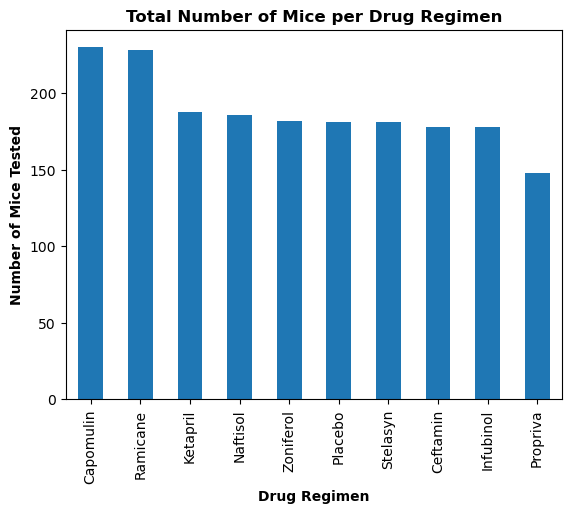

In [493]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_tested_Count=regimen_grouped["Mouse ID"].count().sort_values(ascending=False)

pd_bar_mice_tested= mice_tested_Count.plot(kind="bar", width=0.5)


# Configure plot, figsize, title, and axis labels
pd_bar_mice_tested.set_title(label='Total Number of Mice per Drug Regimen', fontweight = 'bold')
pd_bar_mice_tested.set_xlabel('Drug Regimen', fontweight = 'bold')
pd_bar_mice_tested.set_ylabel('Number of Mice Tested', fontweight = 'bold')

# Show plot
plt.show()

TypeError: unhashable type: 'numpy.ndarray'

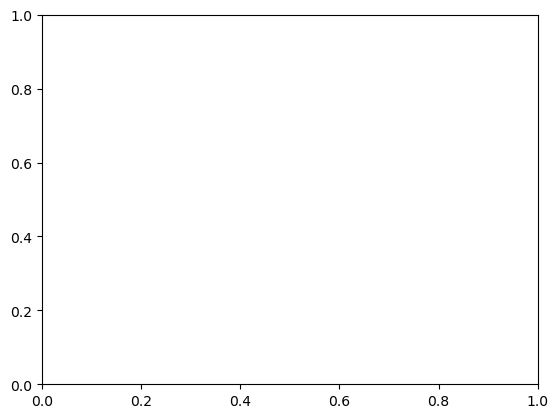

In [526]:
 # Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis= np.arange(len(regimen_grouped))
regimen_name=regimen_grouped["Drug Regimen"].unique()

#plot bar chart
plt.bar(x_axis, regimen_grouped, color="green", width=0.8)
plt.show()    

In [537]:
mice_sex = new_df.groupby("Sex")["Sex"].count()
mice_sex                                 

Sex
Female    922
Male      958
Name: Sex, dtype: int64

(-1.1057967798535038,
 1.1171944866462704,
 -1.1079077057918647,
 1.1109193649436655)

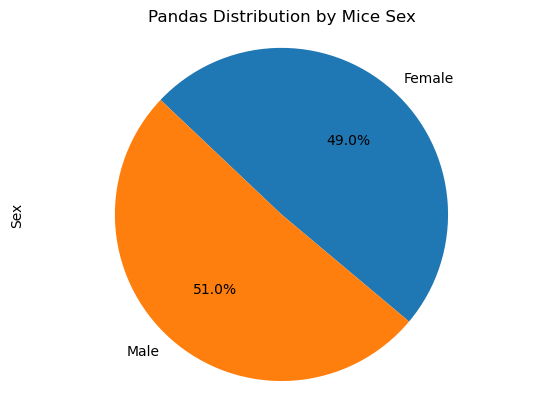

In [558]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = new_df.groupby("Sex")["Sex"].count()

#generate pd pie chart
pandas_pie_plot= mice_sex.plot(kind="pie",autopct = "%1.1f%%", title="Pandas Distribution by Mice Sex", startangle=320)
plt.axis("equal")


(-1.1272585351526159,
 1.1101410553673792,
 -1.1228276690280699,
 1.1104295916068467)

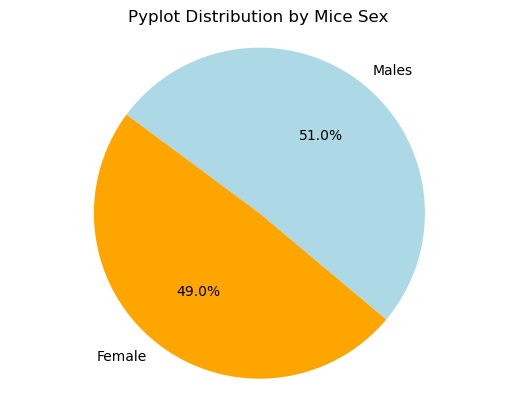

In [559]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = ["Males", "Female"]

# The values of each section of the pie chart
sizes = new_df["Sex"].value_counts()

# The colors of each section of the pie chart
colors = ["lightblue", "orange"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, colors=colors, 
        autopct="%1.1f%%",  startangle=320)
plt.title("Pyplot Distribution by Mice Sex")

#to create a round pie
plt.axis("equal")
        


## Quartiles, Outliers and Boxplots

In [561]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# filter under column "Drug Regimen" and rows listed above

filter_volume=new_df.groupby(["Drug Regimen", "Mouse ID"]).last()[["Timepoint","Tumor Volume (mm3)"]]


#create a list
Regimen=["Capomulin", "Ramicane", "Infubinol","Regimen","Ceftamin"] 



# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


KeyError: 'Drug Regimen'

In [330]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [331]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

In [332]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



In [333]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

In [114]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

